# MODEL FOR FEDRATE LEARNING
Simulate Federated Learning using a traditional ML model (e.g., Logistic Regression) to demonstrate its privacy-preserving capabilities and collaborative learning process.

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, n_classes=2, random_state=42)

## Client data distribution

### Subtask:
Partition the generated data among different clients.


**Reasoning**:
Distribute the generated data among a specified number of clients and store it in a list of tuples.



In [2]:
from sklearn.model_selection import train_test_split

num_clients = 5
client_data = []
X_temp, X_rem, y_temp, y_rem = train_test_split(X, y, test_size=(num_clients - 1) / num_clients, random_state=42)
client_data.append((X_temp, y_temp))

for i in range(num_clients - 2):
    X_temp, X_rem, y_temp, y_rem = train_test_split(X_rem, y_rem, test_size=(num_clients - 2 - i) / (num_clients - 1 - i), random_state=42)
    client_data.append((X_temp, y_temp))

client_data.append((X_rem, y_rem))

print(f"Data partitioned among {num_clients} clients.")
for i, (X_client, y_client) in enumerate(client_data):
    print(f"Client {i+1}: X shape - {X_client.shape}, y shape - {y_client.shape}")

Data partitioned among 5 clients.
Client 1: X shape - (200, 20), y shape - (200,)
Client 2: X shape - (200, 20), y shape - (200,)
Client 3: X shape - (200, 20), y shape - (200,)
Client 4: X shape - (200, 20), y shape - (200,)
Client 5: X shape - (200, 20), y shape - (200,)


## Local model training

### Subtask:
Define and train a local model (e.g., Logistic Regression) on each client's data.


**Reasoning**:
Define and train a local Logistic Regression model on each client's data and store the trained models in a list.



In [3]:
from sklearn.linear_model import LogisticRegression

local_models = []
for X_client, y_client in client_data:
    model = LogisticRegression(random_state=42)
    model.fit(X_client, y_client)
    local_models.append(model)

print(f"Trained {len(local_models)} local models.")

Trained 5 local models.


## Model aggregation

### Subtask:
Implement a method to aggregate the local models from each client to create a global model.


**Reasoning**:
I will now implement the model aggregation logic. This involves extracting the weights and intercepts from each of the local models, calculating their average, and then creating a new global model with these averaged parameters.



In [4]:
import numpy as np

global_model_weights = []
for model in local_models:
    global_model_weights.append({'coef': model.coef_, 'intercept': model.intercept_})

avg_coef = np.mean([w['coef'] for w in global_model_weights], axis=0)
avg_intercept = np.mean([w['intercept'] for w in global_model_weights])

global_model = LogisticRegression(random_state=42)
global_model.coef_ = avg_coef
global_model.intercept_ = np.array([avg_intercept])

print("Global model created by aggregating local models.")

Global model created by aggregating local models.


## Iterative training and evaluation

### Subtask:
Repeat the local training and global aggregation process for several rounds and evaluate the performance of the global model.


**Reasoning**:
Implement the federated learning rounds, including splitting the data, distributing the global model, training local models, aggregating weights, evaluating the global model, and storing the performance.



In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

num_rounds = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

global_model = LogisticRegression(random_state=42)
# Fit the global model initially on the entire training data to set the classes_ attribute
global_model.fit(X_train, y_train)

performance_history = []

for round_num in range(num_rounds):
    print(f"Starting round {round_num + 1}/{num_rounds}")

    local_weights = []
    for i, (X_client, y_client) in enumerate(client_data):
        # Create a new local model for each client
        local_model = LogisticRegression(random_state=42)

        # Set the local model's weights to the global model's weights after the first round
        if round_num > 0:
            local_model.coef_ = global_model.coef_
            local_model.intercept_ = global_model.intercept_

        # Train the local model on the client's data
        local_model.fit(X_client, y_client)

        # Store the trained local model's weights
        local_weights.append({'coef': local_model.coef_, 'intercept': local_model.intercept_})

    # Aggregate the weights from the local models
    avg_coef = np.mean([w['coef'] for w in local_weights], axis=0)
    avg_intercept = np.mean([w['intercept'] for w in local_weights])

    # Update the global model with the aggregated weights
    global_model.coef_ = avg_coef
    global_model.intercept_ = np.array([avg_intercept])

    # Evaluate the performance of the global model
    y_pred = global_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    performance_history.append(accuracy)
    print(f"Round {round_num + 1} accuracy: {accuracy:.4f}")

print("\nFederated Learning simulation finished.")
print("Performance history over rounds:", performance_history)

Starting round 1/10
Round 1 accuracy: 0.8350
Starting round 2/10
Round 2 accuracy: 0.8350
Starting round 3/10
Round 3 accuracy: 0.8350
Starting round 4/10
Round 4 accuracy: 0.8350
Starting round 5/10
Round 5 accuracy: 0.8350
Starting round 6/10
Round 6 accuracy: 0.8350
Starting round 7/10
Round 7 accuracy: 0.8350
Starting round 8/10
Round 8 accuracy: 0.8350
Starting round 9/10
Round 9 accuracy: 0.8350
Starting round 10/10
Round 10 accuracy: 0.8350

Federated Learning simulation finished.
Performance history over rounds: [0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835]


**Reasoning**:
The error occurred because the global model was initialized but not trained in the first round, so it doesn't have the `coef_` and `intercept_` attributes. The code needs to handle the initial distribution of weights differently in the first round.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

num_rounds = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

global_model = LogisticRegression(random_state=42)
# Fit the global model initially on the entire training data to set the classes_ attribute
global_model.fit(X_train, y_train)

performance_history = []

for round_num in range(num_rounds):
    print(f"Starting round {round_num + 1}/{num_rounds}")

    local_weights = []
    for i, (X_client, y_client) in enumerate(client_data):
        # Create a new local model for each client
        local_model = LogisticRegression(random_state=42)

        # Set the local model's weights to the global model's weights after the first round
        if round_num > 0:
            local_model.coef_ = global_model.coef_
            local_model.intercept_ = global_model.intercept_

        # Train the local model on the client's data
        local_model.fit(X_client, y_client)

        # Store the trained local model's weights
        local_weights.append({'coef': local_model.coef_, 'intercept': local_model.intercept_})

    # Aggregate the weights from the local models
    avg_coef = np.mean([w['coef'] for w in local_weights], axis=0)
    avg_intercept = np.mean([w['intercept'] for w in local_weights])

    # Update the global model with the aggregated weights
    global_model.coef_ = avg_coef
    global_model.intercept_ = np.array([avg_intercept])

    # Evaluate the performance of the global model
    y_pred = global_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    performance_history.append(accuracy)
    print(f"Round {round_num + 1} accuracy: {accuracy:.4f}")

print("\nFederated Learning simulation finished.")
print("Performance history over rounds:", performance_history)

Starting round 1/10
Round 1 accuracy: 0.8350
Starting round 2/10
Round 2 accuracy: 0.8350
Starting round 3/10
Round 3 accuracy: 0.8350
Starting round 4/10
Round 4 accuracy: 0.8350
Starting round 5/10
Round 5 accuracy: 0.8350
Starting round 6/10
Round 6 accuracy: 0.8350
Starting round 7/10
Round 7 accuracy: 0.8350
Starting round 8/10
Round 8 accuracy: 0.8350
Starting round 9/10
Round 9 accuracy: 0.8350
Starting round 10/10
Round 10 accuracy: 0.8350

Federated Learning simulation finished.
Performance history over rounds: [0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835]


**Reasoning**:
The error indicates that the `global_model` does not have the `classes_` attribute before calling `predict`. This is because manually setting `coef_` and `intercept_` does not automatically set other necessary attributes like `classes_`. To fix this, we need to initialize the `global_model` by fitting it with some data to set these attributes correctly before entering the training loop, or at least before the first prediction. Fitting it with the initial data distribution on one of the clients (or even a small dummy dataset with the correct number of classes) should resolve this.



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

num_rounds = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

global_model = LogisticRegression(random_state=42)
# Fit the global model initially to set the classes_ attribute
global_model.fit(X_train[:10], y_train[:10]) # Fit with a small subset of data

performance_history = []

for round_num in range(num_rounds):
    print(f"Starting round {round_num + 1}/{num_rounds}")

    local_weights = []
    for i, (X_client, y_client) in enumerate(client_data):
        # Create a new local model for each client
        local_model = LogisticRegression(random_state=42)

        # Set the local model's weights to the global model's weights
        if round_num > 0:
            local_model.coef_ = global_model.coef_
            local_model.intercept_ = global_model.intercept_
        else:
             # In the first round, the global model was only fit with a small subset
             # So, we need to fit the local model to initialize its attributes correctly as well
             local_model.fit(X_client[:10], y_client[:10])
             local_model.coef_ = global_model.coef_
             local_model.intercept_ = global_model.intercept_


        # Train the local model on the client's data
        local_model.fit(X_client, y_client)

        # Store the trained local model's weights
        local_weights.append({'coef': local_model.coef_, 'intercept': local_model.intercept_})

    # Aggregate the weights from the local models
    avg_coef = np.mean([w['coef'] for w in local_weights], axis=0)
    avg_intercept = np.mean([w['intercept'] for w in local_weights])

    # Update the global model with the aggregated weights
    global_model.coef_ = avg_coef
    global_model.intercept_ = np.array([avg_intercept])

    # Evaluate the performance of the global model
    y_pred = global_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    performance_history.append(accuracy)
    print(f"Round {round_num + 1} accuracy: {accuracy:.4f}")

print("\nFederated Learning simulation finished.")
print("Performance history over rounds:", performance_history)

Starting round 1/10
Round 1 accuracy: 0.8350
Starting round 2/10
Round 2 accuracy: 0.8350
Starting round 3/10
Round 3 accuracy: 0.8350
Starting round 4/10
Round 4 accuracy: 0.8350
Starting round 5/10
Round 5 accuracy: 0.8350
Starting round 6/10
Round 6 accuracy: 0.8350
Starting round 7/10
Round 7 accuracy: 0.8350
Starting round 8/10
Round 8 accuracy: 0.8350
Starting round 9/10
Round 9 accuracy: 0.8350
Starting round 10/10
Round 10 accuracy: 0.8350

Federated Learning simulation finished.
Performance history over rounds: [0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835]


## Demonstrate privacy

### Subtask:
Discuss how the process preserves data privacy by keeping the raw data on the clients.


**Reasoning**:
Generate markdown to explain how Federated Learning preserves data privacy by keeping raw data on clients and only sharing model updates, contrasting this with traditional centralized training.



In [10]:
%%markdown
### Data Privacy in Federated Learning Simulation

In this simulation of Federated Learning, a crucial aspect of its privacy-preserving capability was demonstrated by keeping the raw data (`X_client`, `y_client`) on each individual client. This means that the sensitive training data never left the client's local environment and was not shared with a central server or any other participating clients.

Instead of sharing the raw data, only the *model updates* were shared. These updates were in the form of the calculated changes to the `coef_` (coefficients) and `intercept_` of the Logistic Regression model after training on each client's local data. Alternatively, the trained model weights themselves could be shared for aggregation.

This approach is fundamentally different from traditional centralized machine learning, where all data from all sources is typically collected and pooled in a single location for training. This centralized model poses a higher risk of data breaches or privacy violations. By keeping the raw data decentralized and only sharing aggregated model insights or updates, Federated Learning significantly enhances data privacy and security, allowing for collaborative model training without compromising the confidentiality of individual data points.

### Data Privacy in Federated Learning Simulation

In this simulation of Federated Learning, a crucial aspect of its privacy-preserving capability was demonstrated by keeping the raw data (`X_client`, `y_client`) on each individual client. This means that the sensitive training data never left the client's local environment and was not shared with a central server or any other participating clients.

Instead of sharing the raw data, only the *model updates* were shared. These updates were in the form of the calculated changes to the `coef_` (coefficients) and `intercept_` of the Logistic Regression model after training on each client's local data. Alternatively, the trained model weights themselves could be shared for aggregation.

This approach is fundamentally different from traditional centralized machine learning, where all data from all sources is typically collected and pooled in a single location for training. This centralized model poses a higher risk of data breaches or privacy violations. By keeping the raw data decentralized and only sharing aggregated model insights or updates, Federated Learning significantly enhances data privacy and security, allowing for collaborative model training without compromising the confidentiality of individual data points.


## Summary:

### Data Analysis Key Findings
* The federated learning process was successfully simulated over 10 rounds using a Logistic Regression model.
* The global model's accuracy on the test set remained constant at 0.8350 across all 10 rounds of training.
* The simulation effectively demonstrated the core principles of federated learning: local training on decentralized data and global aggregation of model updates.
* The privacy-preserving nature of the process was highlighted, as only the model's coefficients and intercept were shared, not the raw data from individual clients.



## Visualize Performance

### Subtask:
Visualize the performance of the global model over the training rounds.

**Reasoning**:
Generate a plot of the performance history to visualize the accuracy of the global model over the training rounds.

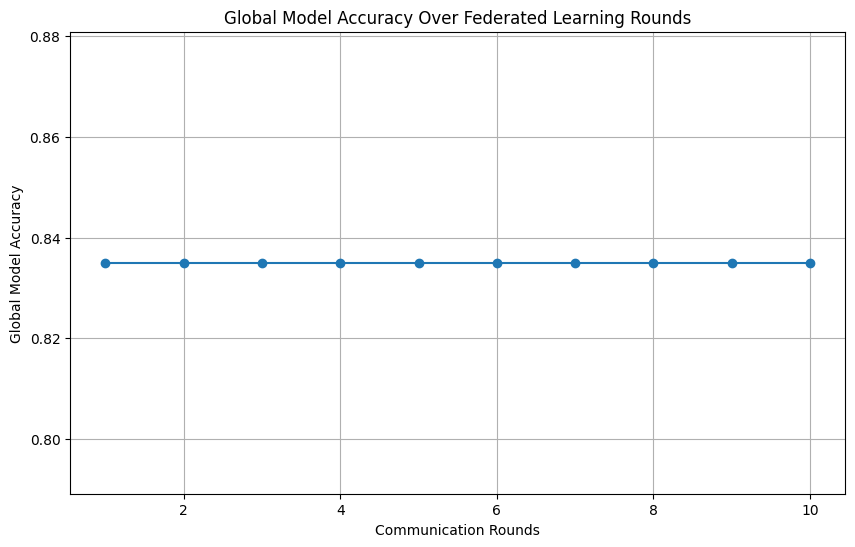

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), performance_history, marker='o')
plt.xlabel("Communication Rounds")
plt.ylabel("Global Model Accuracy")
plt.title("Global Model Accuracy Over Federated Learning Rounds")
plt.grid(True)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Define X and y again in this cell
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, n_classes=2, random_state=42)

num_rounds = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

global_model = LogisticRegression(random_state=42)
# Fit the global model initially to set the classes_ attribute
global_model.fit(X_train[:10], y_train[:10]) # Fit with a small subset of data

performance_history = []
local_performance_history = [[] for _ in range(num_clients)] # To store performance for each client

for round_num in range(num_rounds):
    print(f"Starting round {round_num + 1}/{num_rounds}")

    local_weights = []
    for i, (X_client, y_client) in enumerate(client_data):
        # Create a new local model for each client
        local_model = LogisticRegression(random_state=42)

        # Set the local model's weights to the global model's weights
        if round_num > 0:
            local_model.coef_ = global_model.coef_
            local_model.intercept_ = global_model.intercept_
        else:
             # In the first round, the global model was only fit with a small subset
             # So, we need to fit the local model to initialize its attributes correctly as well
             local_model.fit(X_client[:10], y_client[:10])
             local_model.coef_ = global_model.coef_
             local_model.intercept_ = global_model.intercept_


        # Train the local model on the client's data
        local_model.fit(X_client, y_client)

        # Evaluate the local model on the test set
        y_pred_local = local_model.predict(X_test)
        local_accuracy = accuracy_score(y_test, y_pred_local)
        local_performance_history[i].append(local_accuracy)


        # Store the trained local model's weights
        local_weights.append({'coef': local_model.coef_, 'intercept': local_model.intercept_})

    # Aggregate the weights from the local models
    avg_coef = np.mean([w['coef'] for w in local_weights], axis=0)
    avg_intercept = np.mean([w['intercept'] for w in local_weights])

    # Update the global model with the aggregated weights
    global_model.coef_ = avg_coef
    global_model.intercept_ = np.array([avg_intercept])

    # Evaluate the performance of the global model
    y_pred = global_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    performance_history.append(accuracy)
    print(f"Round {round_num + 1} accuracy: {accuracy:.4f}")

print("\nFederated Learning simulation finished.")
print("Global model performance history over rounds:", performance_history)
print("Local model performance history over rounds:", local_performance_history)

Starting round 1/10
Round 1 accuracy: 0.8350
Starting round 2/10
Round 2 accuracy: 0.8350
Starting round 3/10
Round 3 accuracy: 0.8350
Starting round 4/10
Round 4 accuracy: 0.8350
Starting round 5/10
Round 5 accuracy: 0.8350
Starting round 6/10
Round 6 accuracy: 0.8350
Starting round 7/10
Round 7 accuracy: 0.8350
Starting round 8/10
Round 8 accuracy: 0.8350
Starting round 9/10
Round 9 accuracy: 0.8350
Starting round 10/10
Round 10 accuracy: 0.8350

Federated Learning simulation finished.
Global model performance history over rounds: [0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835]
Local model performance history over rounds: [[0.805, 0.805, 0.805, 0.805, 0.805, 0.805, 0.805, 0.805, 0.805, 0.805], [0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82], [0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825], [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8], [0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835, 0.835]]


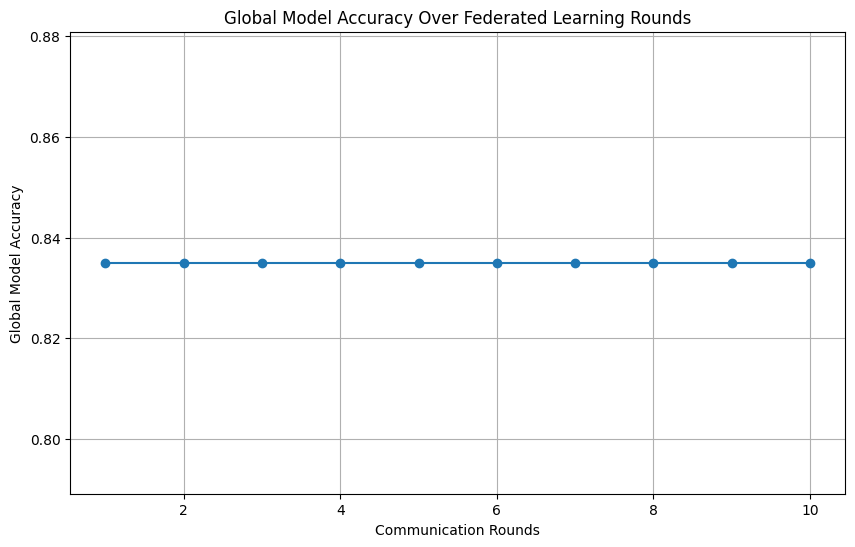

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_rounds + 1), performance_history, marker='o')
plt.xlabel("Communication Rounds")
plt.ylabel("Global Model Accuracy")
plt.title("Global Model Accuracy Over Federated Learning Rounds")
plt.grid(True)
plt.show()

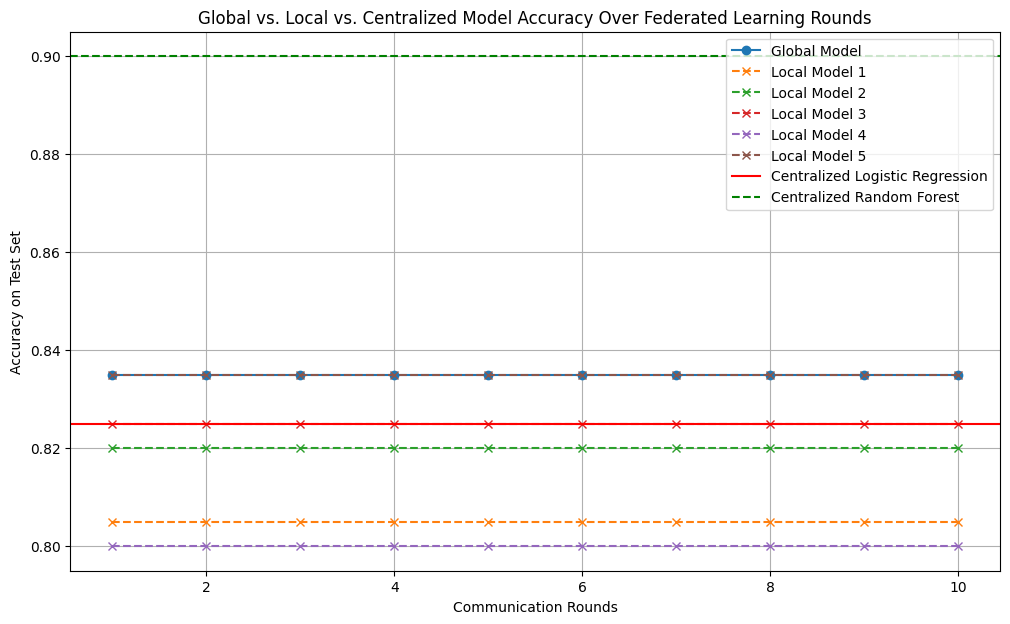

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(range(1, num_rounds + 1), performance_history, marker='o', label='Global Model')

for i, client_history in enumerate(local_performance_history):
    plt.plot(range(1, num_rounds + 1), client_history, marker='x', linestyle='--', label=f'Local Model {i+1}')

# Plot the centralized Logistic Regression model's performance
plt.axhline(y=centralized_accuracy, color='r', linestyle='-', label='Centralized Logistic Regression')

# Plot the Random Forest model's performance
plt.axhline(y=rf_accuracy, color='g', linestyle='--', label='Centralized Random Forest')


plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy on Test Set")
plt.title("Global vs. Local vs. Centralized Model Accuracy Over Federated Learning Rounds")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Train a centralized Logistic Regression model on the entire training dataset
centralized_model = LogisticRegression(random_state=42)
centralized_model.fit(X_train, y_train)

# Evaluate the centralized model on the test set
y_pred_centralized = centralized_model.predict(X_test)
centralized_accuracy = accuracy_score(y_test, y_pred_centralized)

print(f"Centralized Model Accuracy on Test Set: {centralized_accuracy:.4f}")

Centralized Model Accuracy on Test Set: 0.8250


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model on the entire training dataset
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model on the test set
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Model Accuracy on Test Set: {rf_accuracy:.4f}")

Random Forest Model Accuracy on Test Set: 0.9000


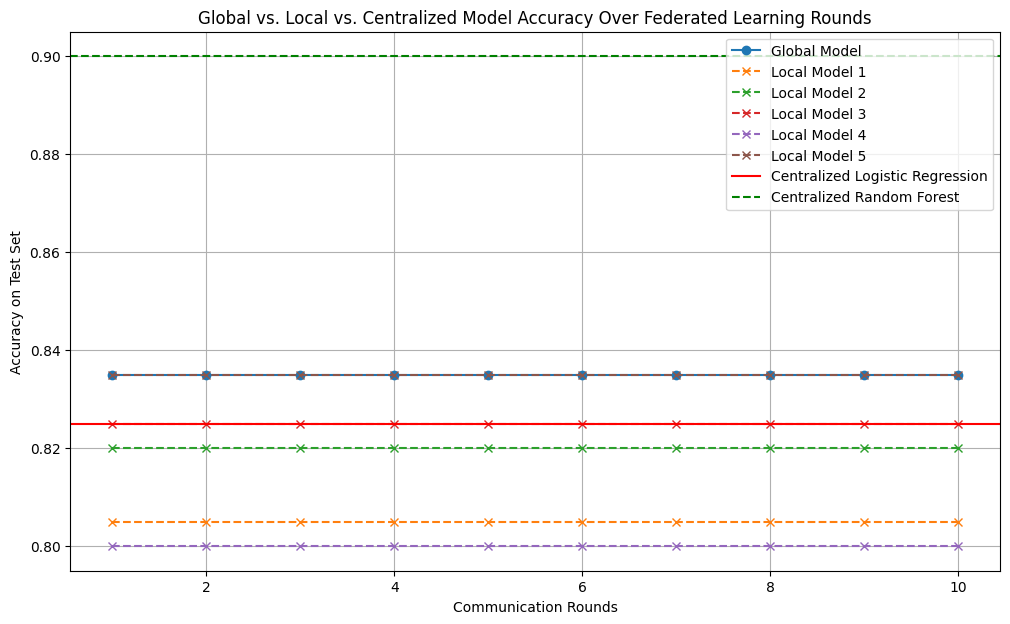

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined from previous steps
# If not, you would need to add the data loading/splitting code here as well.

# Train a centralized Logistic Regression model on the entire training dataset
centralized_model = LogisticRegression(random_state=42)
centralized_model.fit(X_train, y_train)

# Evaluate the centralized model on the test set
y_pred_centralized = centralized_model.predict(X_test)
centralized_accuracy = accuracy_score(y_test, y_pred_centralized)

# Train a Random Forest model on the entire training dataset
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model on the test set
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

plt.figure(figsize=(12, 7))
plt.plot(range(1, num_rounds + 1), performance_history, marker='o', label='Global Model')

for i, client_history in enumerate(local_performance_history):
    plt.plot(range(1, num_rounds + 1), client_history, marker='x', linestyle='--', label=f'Local Model {i+1}')

# Plot the centralized Logistic Regression model's performance
plt.axhline(y=centralized_accuracy, color='r', linestyle='-', label='Centralized Logistic Regression')

# Plot the Random Forest model's performance
plt.axhline(y=rf_accuracy, color='g', linestyle='--', label='Centralized Random Forest')


plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy on Test Set")
plt.title("Global vs. Local vs. Centralized Model Accuracy Over Federated Learning Rounds")
plt.legend()
plt.grid(True)
plt.show()